# <U>**Mini Project 4**</U>

 ## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("transformed_sales_data.csv")

df.head()

,customer_name,order_date,sales,quantity_ordered,returned?,high_value_order,year,month,unit_price,quantity_size,returned_flag,day_of_week,is_weekend,sales_range,cumulative_sales,order_id
0,Alice,2023-01-15,1000.000000,2.0,Yes,True,2023.0,January,500.000000,Medium,1,Sunday,True,High,1000.000000,ORD0001
1,Bob,NaN,850.000000,3.0,No,True,NaN,NaN,283.333333,Medium,0,NaN,False,High,1850.000000,ORD0002
2,alice,NaN,592.857143,1.0,Yes,True,NaN,NaN,592.857143,Low,1,NaN,False,Medium,2442.857143,ORD0003
3,Charlie,NaN,550.000000,1.0,Yes,True,NaN,NaN,550.000000,Low,1,NaN,False,Medium,2992.857143,ORD0004
4,David,NaN,900.000000,4.0,No,True,NaN,NaN,225.000000,High,0,NaN,False,High,3892.857143,ORD0005


## Level 1: Basic Overview of the Dataset

In [20]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic stats:\n", df.describe())

Shape of dataset: (10, 16)

Data types:
 customer_name        object
order_date           object
sales               float64
quantity_ordered    float64
returned?            object
high_value_order       bool
year                float64
month                object
unit_price          float64
quantity_size        object
returned_flag         int64
day_of_week          object
is_weekend             bool
sales_range          object
cumulative_sales    float64
order_id             object
dtype: object

Missing values:
 customer_name       0
order_date          9
sales               0
quantity_ordered    0
returned?           0
high_value_order    0
year                9
month               9
unit_price          0
quantity_size       0
returned_flag       0
day_of_week         9
is_weekend          0
sales_range         0
cumulative_sales    0
order_id            0
dtype: int64

Basic stats:
              sales  quantity_ordered    year  unit_price  returned_flag  \
count    10.000000      

## Level 2: Total Sales Overview

In [4]:
total_sales = df['sales'].sum()
average_sales = df['sales'].mean()

print("Total Sales: ₹", round(total_sales, 2))
print("Average Sale: ₹", round(average_sales, 2))

Total Sales: ₹ 5928.57
Average Sale: ₹ 592.86


## Level 3: Top 5 Customers by Total Sales

In [7]:
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head()
print(top_customers)

customer_name
Alice    1000.000000
David     900.000000
Bob       850.000000
Eve       592.857143
alice     592.857143
Name: sales, dtype: float64


## Level 4: Sales by Month (Bar Chart)

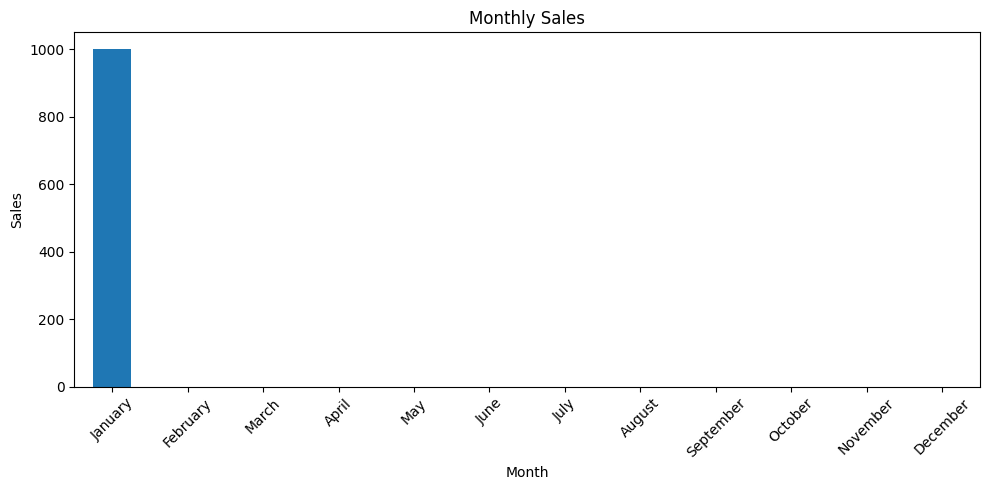

In [12]:
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('month')['sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Level 5: Returned vs Not Returned Sales (Pie Chart)

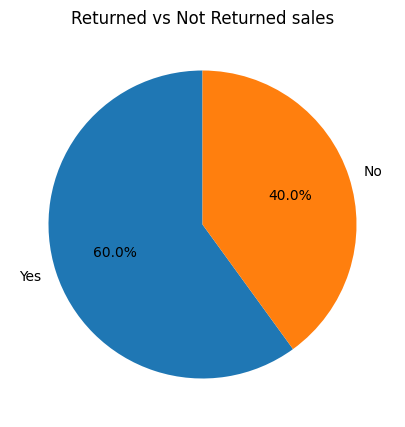

In [14]:
plt.figure(figsize=(10,5))

df['returned?'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Returned vs Not Returned sales')
plt.ylabel("")
plt.show()

## Level 6: Sales Distribution (Histogram)

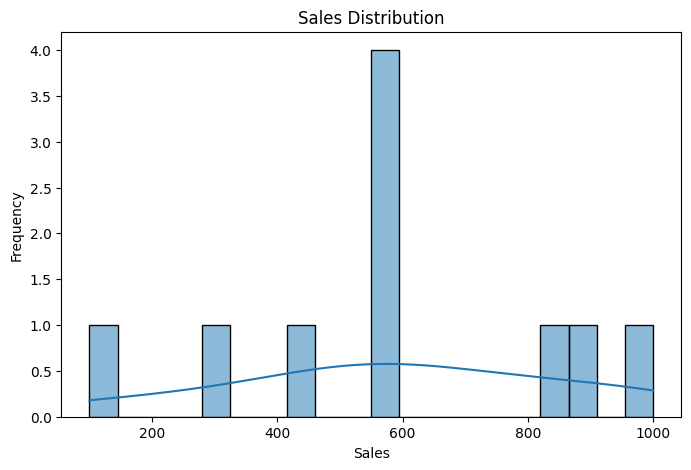

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=20, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

##  Level 7: Correlation Heatmap

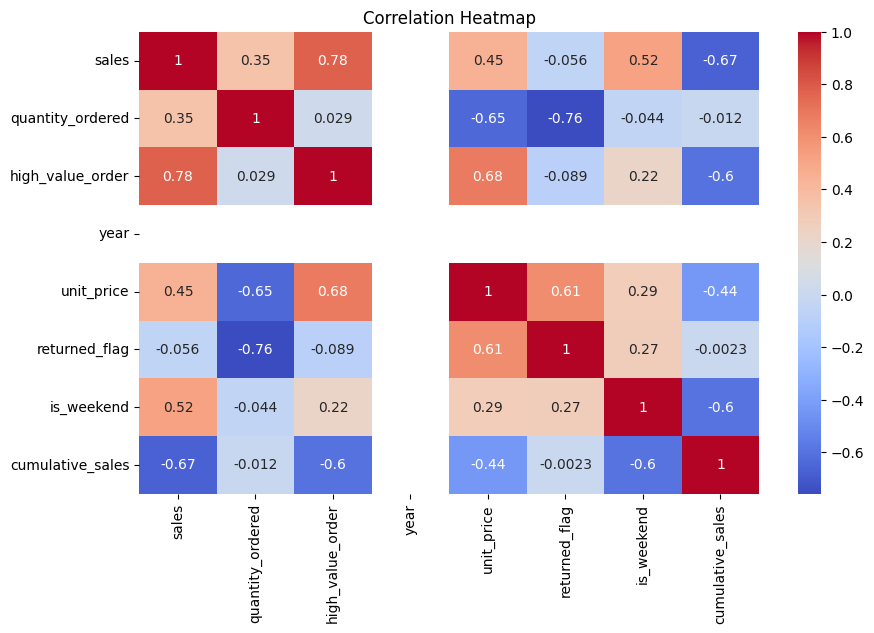

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##  Level 8: Sales by Day of Week (Box Plot)

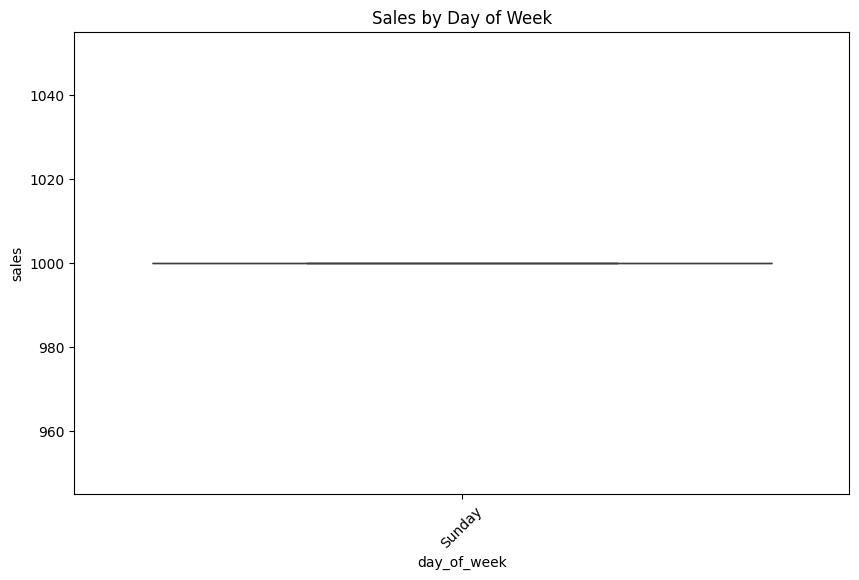

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='sales', data=df)
plt.title("Sales by Day of Week")
plt.xticks(rotation=45)
plt.show()

## Level 9: Compare Sales on Weekend vs Weekday

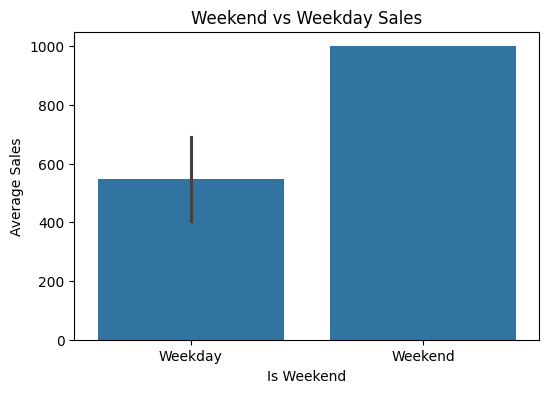

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_weekend', y='sales', data=df)
plt.title("Weekend vs Weekday Sales")
plt.xlabel("Is Weekend")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


## Level 10: Save Summary Insights

In [22]:
# Example summary
summary = {
    "Total Sales": df['sales'].sum(),
    "Average Sale Value": df['sales'].mean(),
    "Highest Single Sale": df['sales'].max(),
    "Most Frequent Customer": df['customer_name'].mode()[0]
}

summary_df = pd.DataFrame(summary.items(), columns=['Metric', 'Value'])
summary_df.to_csv("EDA_summary.csv", index=False)

print("\nEDA summary saved as 'EDA_summary.csv'")



EDA summary saved as 'EDA_summary.csv'


In [23]:
summary_df

,Metric,Value
0,Total Sales,5928.571429
1,Average Sale Value,592.857143
2,Highest Single Sale,1000.0
3,Most Frequent Customer,Alice


##  Interactive EDA Dashboard with Plotly in Jupyter

### Step 1 — Install & Import Plotly

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


### Step 2 — Load Data

In [2]:
# Load your transformed sales data
df = pd.read_csv("transformed_sales_data.csv")
df.head()


,customer_name,order_date,sales,quantity_ordered,returned?,high_value_order,year,month,unit_price,quantity_size,returned_flag,day_of_week,is_weekend,sales_range,cumulative_sales,order_id
0,Alice,2023-01-15,1000.000000,2.0,Yes,True,2023.0,January,500.000000,Medium,1,Sunday,True,High,1000.000000,ORD0001
1,Bob,NaN,850.000000,3.0,No,True,NaN,NaN,283.333333,Medium,0,NaN,False,High,1850.000000,ORD0002
2,alice,NaN,592.857143,1.0,Yes,True,NaN,NaN,592.857143,Low,1,NaN,False,Medium,2442.857143,ORD0003
3,Charlie,NaN,550.000000,1.0,Yes,True,NaN,NaN,550.000000,Low,1,NaN,False,Medium,2992.857143,ORD0004
4,David,NaN,900.000000,4.0,No,True,NaN,NaN,225.000000,High,0,NaN,False,High,3892.857143,ORD0005


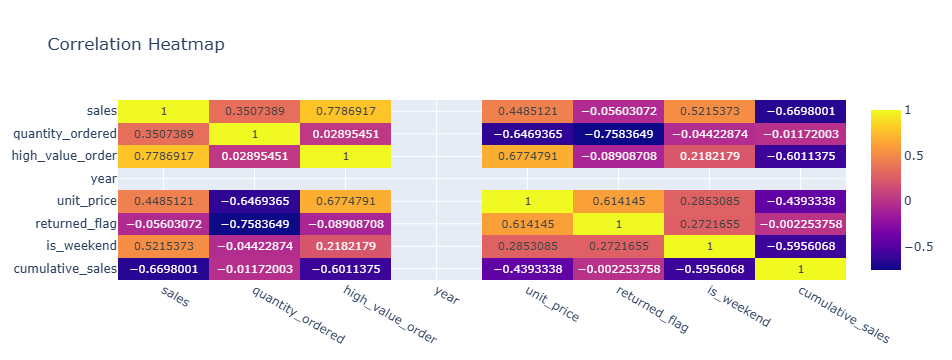

In [11]:
import numpy as np

corr_matrix = df.corr(numeric_only=True)
fig = px.imshow(corr_matrix, 
                text_auto=True,
                aspect="auto",
                title="Correlation Heatmap")
fig.show()


Columns in df: ['customer_name', 'order_date', 'sales', 'quantity_ordered', 'returned?', 'high_value_order', 'year', 'month', 'unit_price', 'quantity_size', 'returned_flag', 'day_of_week', 'is_weekend', 'sales_range', 'cumulative_sales', 'order_id']


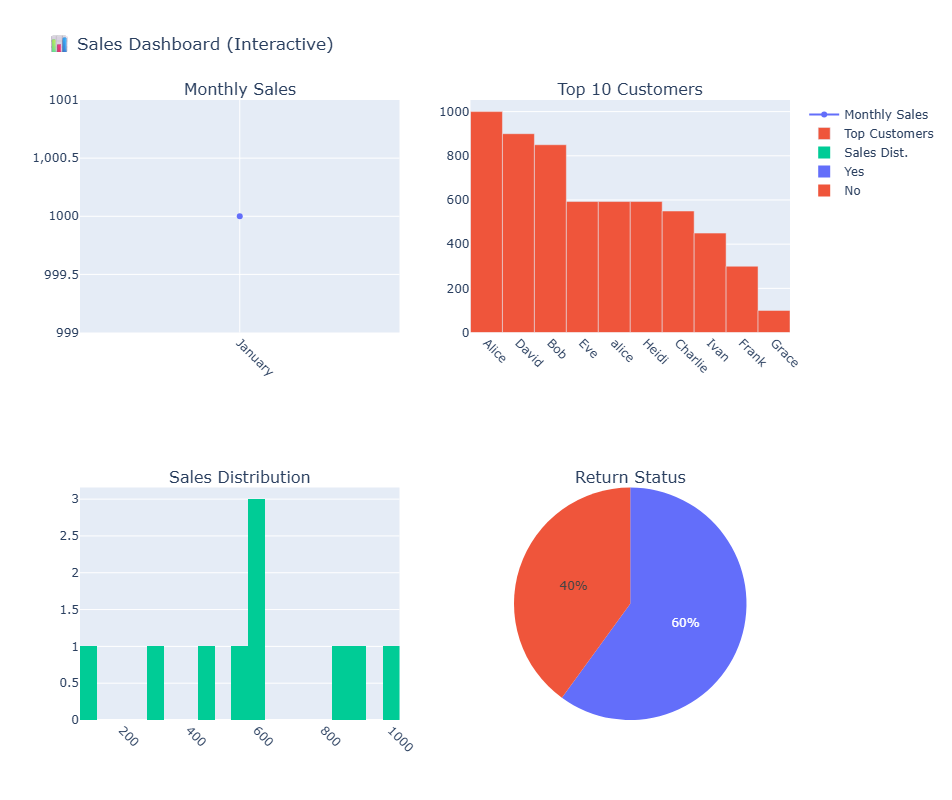

In [14]:
# Robust Step 8: Build dashboard with safety checks
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---------- 1) Make sure df is loaded ----------
# If you haven't loaded df yet, uncomment and update the path:
# df = pd.read_csv("transformed_sales_data.csv")

print("Columns in df:", df.columns.tolist())

# ---------- 2) Ensure required columns exist or create them ----------
required = ['sales', 'customer_name']
for col in required:
    if col not in df.columns:
        raise KeyError(f"Required column missing: '{col}'. Check your dataframe.")

# If 'month' missing, try to derive from order_date
if 'month' not in df.columns:
    if 'order_date' in df.columns:
        df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
        df['month'] = df['order_date'].dt.month_name()
        print("Derived 'month' from 'order_date'.")
    else:
        print("Warning: 'month' and 'order_date' missing. Monthly chart will be empty.")

# Normalize the returned column - try common names
returned_col = None
for cand in ['returned?', 'returned', 'returned_flag']:
    if cand in df.columns:
        returned_col = cand
        break
if returned_col is None:
    print("Note: no 'returned?' column found. Pie chart will be empty. Proceeding anyway.")

# ---------- 3) Convert numeric columns safely ----------
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
sales_values = df['sales'].dropna()
if sales_values.empty:
    print("Warning: 'sales' column has no numeric values after conversion.")

# ---------- 4) Prepare data for plots ----------
# Monthly sales (ordered by calendar)
if 'month' in df.columns:
    monthly_sales = df.groupby('month')['sales'].sum().reset_index()
    month_order = ['January','February','March','April','May','June',
                   'July','August','September','October','November','December']
    monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
    monthly_sales = monthly_sales.sort_values('month')
else:
    monthly_sales = pd.DataFrame({'month':[], 'sales':[]})

# Top customers
top_customers = df.groupby('customer_name')['sales'].sum().nlargest(10).reset_index()

# Returns count
returns_count = pd.DataFrame(columns=['returned_status','count'])
if returned_col:
    tmp = df[returned_col].astype(str).str.strip()
    # try some normalization for display
    tmp = tmp.str.lower().map({'yes':'Yes','y':'Yes','no':'No','n':'No'}).fillna(tmp)
    returns_count = tmp.value_counts().reset_index()
    returns_count.columns = ['returned_status','count']

# ---------- 5) Build subplots ----------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Monthly Sales", "Top 10 Customers", "Sales Distribution", "Return Status"),
    specs=[[{"type":"xy"}, {"type":"xy"}],
           [{"type":"xy"}, {"type":"domain"}]]
)

# Monthly Sales - line
if not monthly_sales.empty:
    fig.add_trace(
        go.Scatter(x=monthly_sales['month'].astype(str), y=monthly_sales['sales'],
                   mode='lines+markers', name="Monthly Sales"),
        row=1, col=1
    )
else:
    fig.add_trace(go.Scatter(x=[], y=[], name="Monthly Sales"), row=1, col=1)

# Top Customers - bar
fig.add_trace(
    go.Bar(x=top_customers['customer_name'], y=top_customers['sales'], name="Top Customers"),
    row=1, col=2
)

# Sales Distribution - histogram
fig.add_trace(
    go.Histogram(x=sales_values, nbinsx=20, name="Sales Dist."),
    row=2, col=1
)

# Return Status - pie
if not returns_count.empty:
    fig.add_trace(
        go.Pie(labels=returns_count['returned_status'], values=returns_count['count'], name="Returns"),
        row=2, col=2
    )
else:
    # add an empty pie with placeholder to avoid errors
    fig.add_trace(go.Pie(labels=["No data"], values=[1], name="Returns"), row=2, col=2)

# ---------- 6) Layout tweaks ----------
fig.update_layout(title_text="📊 Sales Dashboard (Interactive)", height=800)
fig.update_xaxes(tickangle=45)

# Show
fig.show()
